# C14008 Lesson 5: Free Day

Today, we're going to be teaching a bunch of random Julia concepts we think are interesting. Hopefully, you guys like it and find some of these concepts enjoyable. Because we're going to be dealing with more packages this week, use this block of code to instantiate packages if you're having issues loading them:

In [1]:
using Pkg; Pkg.instantiate()

## Presentations

First, let's present the problems for homework. These were:

- Problem 22
- Problem 42
- Problem 10
- Minesweeper

## Writing Python in Julia
> "The kids will go nuts for this one" - Christian

Julia is great in that it provides the `PyCall` package. You can import the PyCall package and import Python packages and run Python code.

In [3]:
using PyCall

base64 = pyimport("base64") # importing modules with pyimport

# b64 encode a string
base64.b64encode(b"Hi class!")

"SGkgY2xhc3Mh"

In [4]:
# b64 decode a string
base64.b64decode(b"SGkgY2xhc3Mh")

"Hi class!"

In [13]:
# Import whatever modules you want (ex: math, hashlib, requests etc)
hl = pyimport("hashlib")
hl.sha256(b"hi class!").hexdigest()

# current XKCD comic: https://xkcd.com/info.0.json
requests = pyimport("requests")

requests.get("https://xkcd.com/info.0.json").json()["alt"]


"Oh no, a musician just burst in through the door confidently twirling a treble clef."

We can also run Python code in Julia with `py` strings. Triple quoted `py""""""` strings are equivalent to an [`exec`](https://docs.python.org/3/library/functions.html#exec) call and **return nothing!** Single quoted `py""` strings are equivalent to using [`eval`](https://docs.python.org/3/library/functions.html#eval) and allow you to call Python functions and access python variables.

In [16]:
# writing a method using a triple quoted string
py"""

def hello_world():
    return "Hello world!"
"""

# calling the method
py"hello_world"()

# evaluating stuff
py"5+5"

10

## Writing Julia in Python
We can also write Julia in Python using the `julia` package in Python. You can sorta just import Julia modules into Python.

In [ ]:
# going to the terminal to run python-jl

## Writing Julia in Julia
Now we're going to be covering some more advanced Julia programming features. First up, Julia macros! A Julia macro returns a piece of code, wrapped in a `:( code )` that is executed when you call the macro. So, it's kinda like a function that returns a function, which then, when you call it, calls the code it returns.

In [18]:
# Write sayhello macro
macro sayhello()
    return :( println("hi class!") )
end

# call sayhello
@sayhello

hi class!


We can also pass functions to our macros, so our macros can control how the functions execute, like Python decorators.

In [19]:
isAllowed = false

# Write security macro
macro security(e::Expr)
    if isAllowed
        return e
    end
    return "You aren't allowed to do that!"
end

@security (macro with 1 method)

In [21]:
# test security macro
@security println("Hello!")

"You aren't allowed to do that!"

### Let's talk about `Symbol`s
A `Symbol` in Julia is sort of in between a string, but they're treated similar to the names of functions or variables. Symbols start with a colon `:` and can have any name you want.

In [22]:
# Defining some symbols
sinsymb = :sin

:sin

We can use symbols to talk about functions or variables. Notice that if we `eval` a symbol, we get the thing it represents.

In [24]:
# eval-ing some symbols
eval(sinsymb)(π)

1.2246467991473532e-16

So this gets really neat, because now we can use symbols as standins for function names, especially in common with the `@eval` macro, which does `eval(quote( code ))`. Say, we want to make a unit circle:

In [31]:
for funcname = [:fun1, :fun2, :fun3]
    @eval $funcname(x) = "I am $($funcname) with param $x"
end

In [34]:
fun3(5)

"I am fun3 with param 5"

In short, `Symbol` &rarr; `eval` call &rarr; thing the symbol represents (function, variable). It's beyond the scope of this class, but `Symbol`s and `Expr`s allow you to generate Julia code really quickly, which is documented in the [Metaprogramming section of the Julia docs](https://docs.julialang.org/en/v1/manual/metaprogramming/).

### Let's talk about `Expr`s

An `Expr` in Julia is a piece of code that can be evaluated, kind of like an "expanded" Symbol. They're what a macro returns. If we want to get extra fancy, we can talk about `quote` blocks. They can contain code and we can call them with the `eval(code)` method.

In [38]:
# Defining and calling a quote block
code = quote
    num = 5+5
    string = "hello"
    println(num, string)
end

# Writing a macro to return a quote
macro doExpression()
    return code
end

@doExpression (macro with 1 method)

In [39]:
@doExpression

10hello


## Data Science bits
### DataFrames.jl

The Julia DataFrames package is intended to be a little like the Python pandas DataFrames class, giving us easy access to our data. For this, I've pulled the class roster.

In [40]:
using CSV, DataFrames

# pulling in roster and setup
students = DataFrame(CSV.File("C14008 Roster and Setup - Attendance Wk 2.csv"))

,Student Name,Student Grade,School
,String,Int64,String
1,Aaron Huang,10,"Boston College High in Dorchester, MA"
2,Advika Agrawal,11,"Hopkinton High School in Contoocook, NH"
3,Akshika Chawade,10,"Braintree High School in Braintree, MA"
4,Alexander Sholl,9,California Academy of Mathematics and Science
5,Amos Batalden,9,Meridian Academy
6,Andrew Sparks,10,"Roxbury Latin in West Roxbury, MA"
7,Annanta Budhathoki,11,"Bedford High in Bedford, MA"
8,Anthony Mundy,9,BAXTER ACADEMY FOR SCIENCE AND TECHNOLOGY
9,Arthur Lee,10,Winchester High School


We access DataFrames similarly to Julia matrices, `df[rows, cols]`.

In [43]:
# pull attendance for 1-Aug and Student Name
students[:, ["25-Jul","1-Aug"]]

,25-Jul,1-Aug
,Bool,Bool
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,0
7,1,1
8,1,1
9,1,0


We can use the `describe` method to learn overall information about our DataFrame, like the percentage of students that showed up to each class!

In [44]:
# describe students
describe(students)[:, Not(["min", "max", "nmissing"])]

,variable,mean,median,nunique,eltype
,Symbol,Union…,Union…,Union…,DataType
1,Student Name,,,48,String
2,Student Grade,9.97917,10.0,,Int64
3,School,,,40,String
4,18-Jul,0.854167,1.0,,Bool
5,25-Jul,0.854167,1.0,,Bool
6,1-Aug,0.729167,1.0,,Bool
7,8-Aug,0.0,0.0,,Bool
8,15-Aug,0.0,0.0,,Bool


We can also add conditions while we're picking which rows and columns we want, by specifying the "1-Aug" column in the `rows` parameter.

In [46]:
# only pick students that showed up for class on August 1st
students[students[:, "1-Aug"], :]

,Student Name,Student Grade,School
,String,Int64,String
1,Aaron Huang,10,"Boston College High in Dorchester, MA"
2,Advika Agrawal,11,"Hopkinton High School in Contoocook, NH"
3,Akshika Chawade,10,"Braintree High School in Braintree, MA"
4,Alexander Sholl,9,California Academy of Mathematics and Science
5,Amos Batalden,9,Meridian Academy
6,Annanta Budhathoki,11,"Bedford High in Bedford, MA"
7,Anthony Mundy,9,BAXTER ACADEMY FOR SCIENCE AND TECHNOLOGY
8,Chloe Chan,10,None
9,Daniel Cho,9,Belmont Hill


In [47]:
# A closer look at how this actually works
students[:, "1-Aug"]

48-element Array{Bool,1}:
 1
 1
 1
 1
 1
 0
 1
 1
 0
 1
 0
 1
 1
 ⋮
 0
 0
 1
 1
 0
 1
 1
 1
 1
 1
 0
 0

### Plotting stuff with `Plots`

Now, let's try and use the `Plots` package to visualize some of this data. First, we need to import the `Plots` package and tell it we're going to use the `GR` backend.

In [48]:
using Plots
gr()

Plots.GRBackend()

Now, let's just plot some mathematical functions, by using a function in place of `y`.

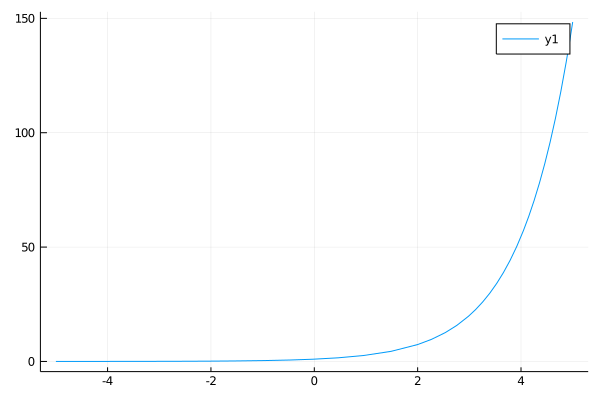

In [52]:
# plotting functions
plot(x=0:5, x -> ℯ^x)

Now, to plot some data out of our Data Frame, we can plot the number of students that showed up to class on each date:

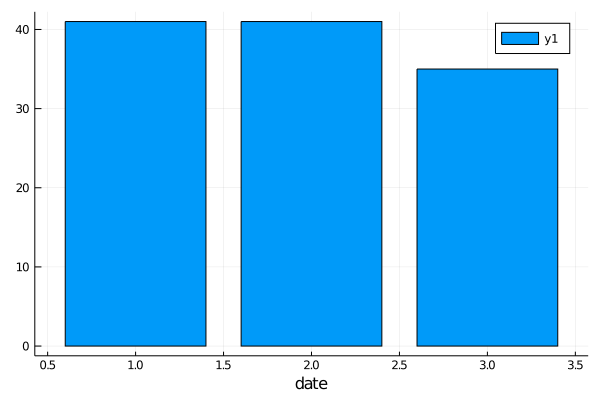

In [53]:
dates = ["18-Jul", "25-Jul", "1-Aug"]
bar([sum(col) for col in eachcol(students[:, dates])], xaxis=("date"))

Plotting daily weather data for the memes

In [54]:
# pull temp data
using PyCall
py"""
import requests
weather = requests.get("https://forecast.weather.gov/MapClick.php?lat=30.33&lon=-97.74&unit=0&lg=english&FcstType=json").json()
"""

data = py"weather"

Dict{Any,Any} with 11 entries:
  "time"               => Dict{Any,Any}("layoutKey"=>"k-p12h-n13-1","startPerio…
  "data"               => Dict{Any,Any}("hazardUrl"=>Any[],"hazard"=>Any[],"pop…
  "creationDateLocal"  => "8 Aug 12:51 pm CDT"
  "location"           => Dict{Any,Any}("zone"=>"TXZ192","county"=>"TXC453","me…
  "productionCenter"   => "Austin/San Antonio, TX"
  "srsName"            => "WGS 1984"
  "moreInformation"    => "http://weather.gov"
  "operationalMode"    => "Production"
  "credit"             => "https://www.weather.gov/ewx"
  "currentobservation" => Dict{Any,Any}("Date"=>"8 Aug 12:51 pm CDT","timezone"…
  "creationDate"       => "2020-08-08T11:51:46-05:00"

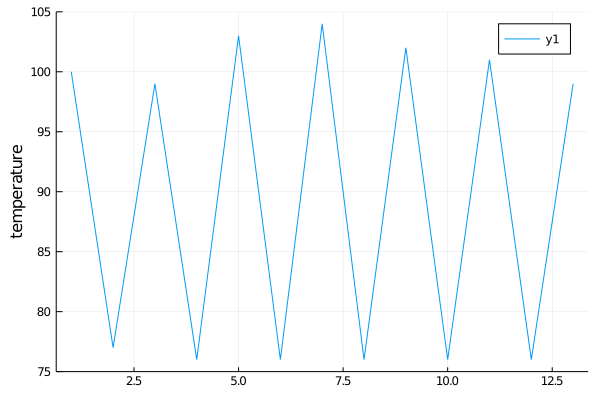

In [56]:
# plot temperature data
plot(parse.(Int, data["data"]["temperature"]), yaxis=("temperature", (75,105)))

## Homework

There's actually no homework! Today's lecture was just mostly for fun, and next lecture is challenge day. If you're itching for something to do, then go have some fun solving Euler problems.  Otherwise, sit back, relax, ask questions, and get ready for next week!